In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
import pandas as pd
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

170500096/170498071 [==============================] - 3s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


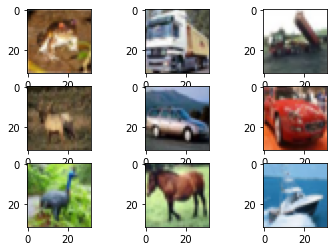

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
total_X = np.concatenate((trainX,testX))
total_X.shape

(60000, 32, 32, 3)

In [ ]:
total_Y = np.concatenate((trainy,testy))
total_Y.shape

(60000, 1)

In [ ]:

# train test split
X_train, X_test, y_train, y_test = train_test_split(total_X, total_Y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(42000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([5, 5, 1, 7, 2], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

**(a) No BatchNormalization**

In [ ]:

cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# use categorical_crossentropy instead  
cnn1.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
s = time.time()
cnn1.fit(X_train, y_train, epochs=10)
e = time.time()

print("total time taken ; ", e-s)

Epoch 1/10
1313/1313 [==============================] - 30s 23ms/step - loss: 2.0517 - accuracy: 0.2590
Epoch 2/10
1313/1313 [==============================] - 30s 23ms/step - loss: 1.6450 - accuracy: 0.4219
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.4420 - accuracy: 0.4925
Epoch 4/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.3149 - accuracy: 0.5325
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.2380 - accuracy: 0.5642
Epoch 6/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.1874 - accuracy: 0.5837
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.1381 - accuracy: 0.6011
Epoch 8/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.0931 - accuracy: 0.6198
Epoch 9/10
1313/1313 [==============================] - 29s 22ms/step - loss: 1.0581 - accuracy: 0.6337
Epoch 10/10
1313/1313 [==============================] - 29s 22m

In [ ]:
loss1, acc1 = cnn1.evaluate(X_test,y_test)

563/563 [==============================] - 5s 9ms/step - loss: 1.2043 - accuracy: 0.5826


**Two Dense Layers. (Note: The last Dense layer should have 10 nodes as there are 10 classes. For the Dense layer before that, use 64 nodes.)**

In [ ]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# use categorical_crossentropy
cnn2.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
s = time.time()
cnn2.fit(X_train, y_train, epochs=10)
e = time.time()

print("total time taken ; ", e-s)

Epoch 1/10
1313/1313 [==============================] - 73s 55ms/step - loss: 1.6980 - accuracy: 0.3983
Epoch 2/10
1313/1313 [==============================] - 72s 55ms/step - loss: 1.1381 - accuracy: 0.6009
Epoch 3/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.9421 - accuracy: 0.6667
Epoch 4/10
1313/1313 [==============================] - 73s 55ms/step - loss: 0.7950 - accuracy: 0.7237
Epoch 5/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.6813 - accuracy: 0.7666
Epoch 6/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.5851 - accuracy: 0.7981
Epoch 7/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.4813 - accuracy: 0.8381
Epoch 8/10
1313/1313 [==============================] - 71s 54ms/step - loss: 0.4062 - accuracy: 0.8656
Epoch 9/10
1313/1313 [==============================] - 72s 55ms/step - loss: 0.3351 - accuracy: 0.8896
Epoch 10/10
1313/1313 [==============================] - 71s 54m

In [ ]:
loss2, acc2 = cnn2.evaluate(X_test,y_test)

563/563 [==============================] - 8s 14ms/step - loss: 1.4202 - accuracy: 0.6379


**2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [ ]:
cnn3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# use categorical_crossentropy
cnn3.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
s = time.time()
cnn3.fit(X_train, y_train, epochs=10)
e = time.time()

print("total time taken ; ", e-s)

Epoch 1/10
1313/1313 [==============================] - 80s 61ms/step - loss: 1.6552 - accuracy: 0.4138
Epoch 2/10
1313/1313 [==============================] - 80s 61ms/step - loss: 1.1443 - accuracy: 0.5941
Epoch 3/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.9551 - accuracy: 0.6654
Epoch 4/10
1313/1313 [==============================] - 81s 61ms/step - loss: 0.8331 - accuracy: 0.7087
Epoch 5/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.7484 - accuracy: 0.7371
Epoch 6/10
1313/1313 [==============================] - 81s 61ms/step - loss: 0.6704 - accuracy: 0.7680
Epoch 7/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.5893 - accuracy: 0.7954
Epoch 8/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.5213 - accuracy: 0.8197
Epoch 9/10
1313/1313 [==============================] - 80s 61ms/step - loss: 0.4502 - accuracy: 0.8443
Epoch 10/10
1313/1313 [==============================] - 81s 61m

In [ ]:
loss3, acc3 = cnn3.evaluate(X_test,y_test)

563/563 [==============================] - 9s 16ms/step - loss: 1.0411 - accuracy: 0.6885


**3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [ ]:
cnn4 = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(momentum=0.15, axis=-1),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# use categorical_crossentropy
cnn4.compile(optimizer=keras.optimizers.SGD(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time
s = time.time()
history = cnn4.fit(X_train, y_train, epochs=10)
e = time.time()

print("total time taken ; ", e-s)

Epoch 1/10
1313/1313 [==============================] - 51s 39ms/step - loss: 1.5052 - accuracy: 0.4610
Epoch 2/10
1313/1313 [==============================] - 51s 39ms/step - loss: 1.2000 - accuracy: 0.5736
Epoch 3/10
1313/1313 [==============================] - 51s 39ms/step - loss: 1.0611 - accuracy: 0.6240
Epoch 4/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.9695 - accuracy: 0.6590
Epoch 5/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.9048 - accuracy: 0.6833
Epoch 6/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.8505 - accuracy: 0.6996
Epoch 7/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.8092 - accuracy: 0.7155
Epoch 8/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.7706 - accuracy: 0.7291
Epoch 9/10
1313/1313 [==============================] - 52s 39ms/step - loss: 0.7372 - accuracy: 0.7416
Epoch 10/10
1313/1313 [==============================] - 52s 39m

In [ ]:
loss4, acc4 = cnn4.evaluate(X_test,y_test)

563/563 [==============================] - 7s 12ms/step - loss: 1.0253 - accuracy: 0.6621


In [ ]:
y_pred = cnn4.predict(X_test)
y_pred[:5]

array([[8.73251796e-01, 6.47489503e-02, 1.44175137e-03, 1.84876462e-05,
        2.00174609e-03, 2.02282558e-06, 4.23793244e-06, 4.81321763e-07,
        5.69944233e-02, 1.53619179e-03],
       [7.38366833e-03, 5.62881120e-02, 1.13106535e-05, 6.98294025e-04,
        5.52980855e-05, 9.56457643e-06, 1.62956599e-06, 1.67814476e-04,
        3.30908000e-02, 9.02293503e-01],
       [5.15852123e-03, 1.00858510e-04, 1.52798146e-01, 1.11435121e-02,
        7.28384480e-02, 5.50808245e-03, 7.51619160e-01, 1.76400295e-04,
        1.95326618e-04, 4.61495365e-04],
       [5.41501567e-02, 7.97049236e-03, 6.35875249e-03, 2.01847088e-05,
        1.47196930e-03, 1.03642446e-06, 4.77181402e-06, 6.84752595e-05,
        9.29743409e-01, 2.10715778e-04],
       [1.48228355e-04, 8.85325611e-01, 1.56581029e-02, 1.82395743e-03,
        7.76799992e-02, 3.55260854e-04, 8.33614846e-04, 1.75809786e-02,
        5.06361364e-04, 8.79684085e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 9, 6, 8, 1]

In [ ]:
y_test[:5]

array([1, 9, 2, 8, 4], dtype=uint8)

In [ ]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

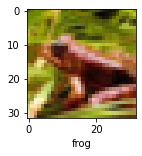

In [ ]:
plot_sample(X_test, y_test,5)

In [ ]:
 cnn4.metrics_names 

['loss', 'accuracy']

**Add a table contrasting the performance of the given architecture with all above variations.**

In [ ]:
data = [["CNN1", loss1, acc1], ["CNN2", loss2, acc2], ["CNN3", loss3, acc3], ["CNN4", loss4, acc4]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ["model", 'Losses', 'Accuracy'])
df

,model,Losses,Accuracy
0,CNN1,1.204309,0.582611
1,CNN2,1.420159,0.637944
2,CNN3,1.041060,0.688500
3,CNN4,1.024087,0.662000


***# Analysis : CNN4 model with 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D works better than rest.***

**(4)  Save the best model.**

In [ ]:
cnn4.save("best_cnn_q1")

INFO:tensorflow:Assets written to: best_cnn_q1/assets


In [ ]:
history.history

{'accuracy': [0.46102380752563477,
  0.5736428499221802,
  0.6239523887634277,
  0.6589999794960022,
  0.6833094954490662,
  0.6996428370475769,
  0.7154523730278015,
  0.7290714383125305,
  0.7415952086448669,
  0.7516190409660339],
 'loss': [1.5051723718643188,
  1.199994444847107,
  1.0611255168914795,
  0.969461977481842,
  0.9048115015029907,
  0.8504661321640015,
  0.8092471361160278,
  0.7705874443054199,
  0.7372301816940308,
  0.7084161639213562]}

**plot the accuracy vs epoch**

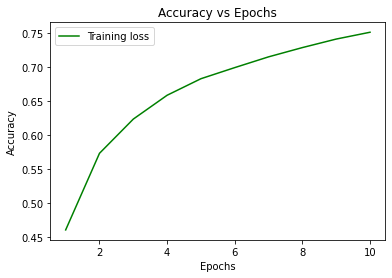

In [ ]:
  accuracy = history.history['accuracy']
  epochs = range(1,11)
  plt.plot(epochs, accuracy, 'g', label='Training loss')
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

**Show the model architecture using model.summary()**

In [ ]:
cnn4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 32)         